In [1]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict 

In [2]:
class BatsmanState(TypedDict):
    runs : int 
    balls : int 
    fours : int 
    sixes : int 

    sr: float 
    bpb: float
    boundary_percent: float 
    summary : str

In [3]:
def calculate_sr(state: BatsmanState) -> BatsmanState :
    sr = state['runs']/state['balls'] *100
    # state['sr'] = sr
    return {'sr': sr}

In [4]:
def calculate_bpb(state: BatsmanState) -> BatsmanState :
    bpb = state['balls'] /(state['fours']+state['sixes'])
    # state['bpb'] = bpb
    return {"bpb" : bpb}

In [5]:
def calculate_boundary(state: BatsmanState) -> BatsmanState :
    boundary = (((state['fours']*4) + (state['sixes']*6))/state['runs'])*100 
    # state['boundary_percent'] = boundary
    return {'boundary_percent' : boundary}

In [6]:
def summary(state: BatsmanState) -> BatsmanState :
    summary = f"""
    strike_rate - {state['sr']} \n 
    Balls per boundary - {state['bpb']} \n 
    Boundary Percent - {state['boundary_percent']}
    """
    # state['summary'] = summary
    return {"summary":summary}

In [7]:
graph = StateGraph(BatsmanState) 

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary', calculate_boundary)
graph.add_node('summary', summary)

In [8]:
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary','summary') 

graph.add_edge('summary',END) 

workflow = graph.compile()


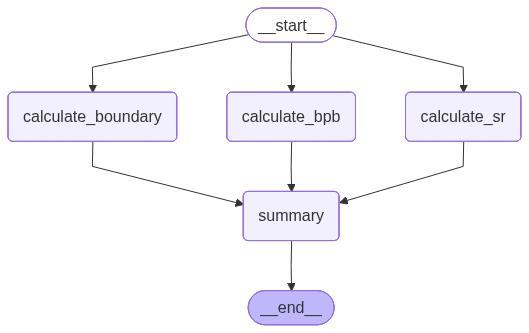

In [9]:
graph.compile()

In [10]:
initial_state = {
    "runs": 100,
    "balls": 50,
    "fours": 6,
    "sixes": 4 
}

In [11]:
workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n    strike_rate - 200.0 \n \n    Balls per boundary - 5.0 \n \n    Boundary Percent - 48.0\n    '}